<a href="https://colab.research.google.com/github/fire-long/4J/blob/main/%EC%9D%8C%EC%95%85%EC%9E%A5%EB%A5%B4%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8(%EC%88%98%EC%A0%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <데이콘 Basic 음악 장르 분류 AI 경진대회>

## 0. Package Import

In [1]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
import mglearn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import f1_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 36.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=578e7d971dbc81abbd324e17b55765dfd5c704b65376691b00c2acefcbca9f84
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 19.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


## 1. 파일 불러오기

In [2]:
genreTrain = pd.read_csv("/content/drive/MyDrive/4J DACON/데이콘 Basic 음악 장르 분류 AI 경진대회/train.csv")

print(genreTrain.info())
print(genreTrain.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25383 entries, 0 to 25382
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                25383 non-null  object 
 1   danceability      25383 non-null  float64
 2   energy            25383 non-null  float64
 3   key               25383 non-null  int64  
 4   loudness          25383 non-null  float64
 5   speechiness       25383 non-null  float64
 6   acousticness      25383 non-null  float64
 7   instrumentalness  25383 non-null  float64
 8   liveness          25383 non-null  float64
 9   valence           25383 non-null  float64
 10  tempo             25383 non-null  float64
 11  duration          25383 non-null  int64  
 12  genre             25383 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 2.5+ MB
None
            ID  danceability  energy  key  loudness  speechiness  \
0  TRAIN_00000        0.3341  0.9231   10    0.8540

## 2. 데이터 전처리
 - 결측치는 없으므로 처리하지 않음
 - key와 duration만 수의 범위가 다르므로 처리 필요 (정규화 - normalization)

*참고: https://soo-jjeong.tistory.com/122, https://nittaku.tistory.com/111


In [3]:
scaler = MinMaxScaler()
genreTrain[["key", "duration"]] = scaler.fit_transform(genreTrain[["key", "duration"]])

print(genreTrain.head())

            ID  danceability  energy       key  loudness  speechiness  \
0  TRAIN_00000        0.3341  0.9231  0.909091    0.8540       0.3797   
1  TRAIN_00001        0.6344  0.5955  0.909091    0.2826       0.1378   
2  TRAIN_00002        0.3983  0.1107  0.727273    0.2459       0.0247   
3  TRAIN_00003        0.3139  0.9702  0.181818    0.9252       0.9590   
4  TRAIN_00004        0.0735  0.9452  0.454545    0.7702       0.1397   

   acousticness  instrumentalness  liveness  valence   tempo  duration  \
0        0.0080            0.0002    0.7697   0.7902  0.5391  0.169160   
1        0.0000            0.7137    0.1597   0.4162  0.3043  0.558113   
2        0.7740            0.0000    0.5105   0.4291  0.2324  0.141542   
3        0.0371            0.3015    0.2539   0.0577  0.5406  0.250863   
4        0.2583            0.0015    0.1774   0.1128  0.3176  0.231300   

        genre  
0        trap  
1      techno  
2  Trap Metal  
3        trap  
4   Dark Trap  


## 3. EDA

Underground Rap    3482
Dark Trap          2696
trance             1837
Hiphop             1822
trap               1814
techhouse          1809
techno             1767
psytrance          1767
hardstyle          1755
dnb                1749
RnB                1308
Trap Metal         1188
Rap                1120
Emo                 999
Pop                 270
Name: genre, dtype: int64


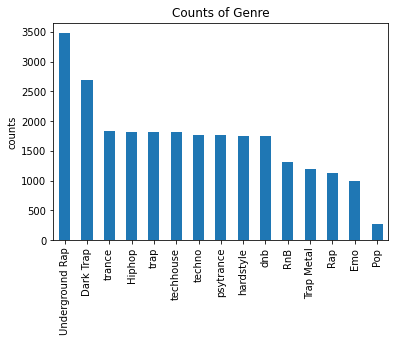

In [4]:
print(genreTrain['genre'].value_counts())

genreTrain['genre'].value_counts().plot.bar()
plt.ylabel('counts')
plt.title("Counts of Genre")
plt.show()

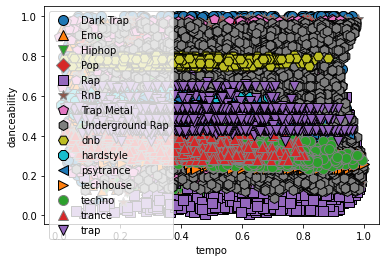

In [5]:
mglearn.discrete_scatter(genreTrain['danceability'], genreTrain['tempo'], genreTrain['genre'])
plt.xlabel('tempo')
plt.ylabel('danceability')
plt.legend()
plt.show()

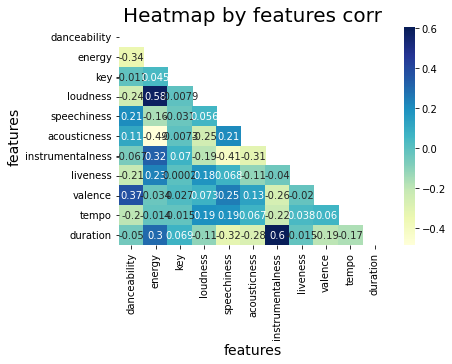

In [6]:
X = genreTrain.drop(genreTrain.columns[[0]], axis = 1)
corr = X.corr()
mask = np.triu(np.ones_like(corr))

sns.heatmap(corr, cmap = 'YlGnBu', annot = True, mask = mask)

plt.title('Heatmap by features corr', fontsize = 20)
plt.xlabel('features', fontsize = 14)
plt.ylabel('features', fontsize = 14)
plt.show()

## 4. 분류 모델 구축

### 4-1. 의사결정나무

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x = genreTrain.iloc[:, 1:12]
y = genreTrain['genre']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
pred_dt = tree.predict(x_test)

print("Macro F1 Score: %.4f" %(f1_score(pred_dt, y_test, average = "macro")))
print("train score: %.3f" %(tree.score(x_train, y_train)))
print("test score: %.3f" %(tree.score(x_test, y_test)))

Macro F1 Score: 0.5490
train score: 0.962
test score: 0.565


### 4-2. 랜덤 포레스트

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

print("Macro F1 Score: %.4f" %(f1_score(pred_rf, y_test, average = "macro")))
print("train score: %.4f" %(rf.score(x_train, y_train)))
print("test score: %.3f" %(rf.score(x_test, y_test)))

Macro F1 Score: 0.6286
train score: 0.9624
test score: 0.666


### 4-3. 그래디언트 부스팅

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(x_train, y_train)
pred_gbrt = gbrt.predict(x_test)

print("Macro F1 Score: %.4f" %(f1_score(pred_gbrt, y_test, average = "macro")))
print("train score: %.3f" %(gbrt.score(x_train, y_train)))
print("test score: %.3f" %(gbrt.score(x_test, y_test)))

Macro F1 Score: 0.6416
train score: 0.752
test score: 0.680


### 4-4. 로지스틱 회귀

In [12]:
from sklearn.linear_model import LogisticRegression

logis = LogisticRegression()
logis.fit(x_train, y_train)
pred_logis = logis.predict(x_test)

print("Macro F1 Score: %.4f" %(f1_score(pred_logis, y_test, average = "macro")))
print("train score: %.4f" %(logis.score(x_train, y_train)))
print("test score: %.3f" %(logis.score(x_test, y_test)))

Macro F1 Score: 0.5356
train score: 0.5811
test score: 0.600


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 4-5. KNN

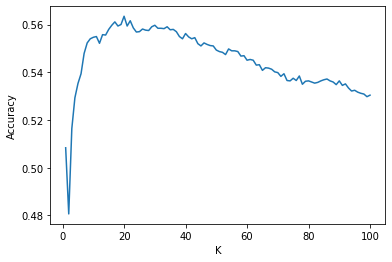

In [13]:
from sklearn.neighbors import KNeighborsClassifier

k_list = range(1, 101)
accuracies = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)
  accuracies.append(knn.score(x_test, y_test))

plt.plot(k_list, accuracies)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)

print("Macro F1 Score: %.4f" %(f1_score(pred_knn, y_test, average = "macro")))
print("train score: %.3f" %(knn.score(x_train, y_train)))
print("test score: %.3f" %(knn.score(x_test, y_test)))

Macro F1 Score: 0.5085
train score: 0.594
test score: 0.564


### 4-6. Naive Bayes 모델 사용

In [15]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
pred_nb = nb.predict(x_test)

print("Macro F1 Score: %.4f" %(f1_score(pred_nb, y_test, average = "macro")))
print("train score: %.3f" %(nb.score(x_train, y_train)))
print("test score: %.3f" %(nb.score(x_test, y_test)))

Macro F1 Score: 0.5666
train score: 0.584
test score: 0.600


### 4-7. OvO, OvR 방식 이용
*참고 : https://seong6496.tistory.com/213

In [17]:
#OvR: 하나 대 나머지를 비교하는 전략(One-versus-all)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(x_train, y_train)
pred_ovr = ovr_clf.predict(x_test)

print("Macro F1 Score: %.4f" %(f1_score(pred_ovr, y_test, average = "macro")))
print("train score: %.3f" %(ovr_clf.score(x_train, y_train)))
print("test score: %.3f" %(ovr_clf.score(x_test, y_test)))

Macro F1 Score: 0.5630
train score: 0.650
test score: 0.621


In [18]:
#OvO: 1대 1로 이진분류기를 만드는 방법(One-versus-one)
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SVC())
ovo_clf.fit(x_train, y_train)
pred_ovo = ovo_clf.predict(x_test)

print("Macro F1 Score: %.4f" %(f1_score(pred_ovo, y_test, average = "macro")))
print("train score: %.3f" %(ovo_clf.score(x_train, y_train)))
print("test score: %.3f" %(ovo_clf.score(x_test, y_test)))

Macro F1 Score: 0.5756
train score: 0.651
test score: 0.640
